In [1]:
# Specification
# https://github.com/SBRG/bigg_models/wiki/BiGG-Models-ID-Specification-and-Guidelines

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

In [3]:
with open('../data/iAM_Pb448.json', 'r') as file:
    models = json.loads(file.read())

## Data Inspection

In [4]:
type(models)

dict

In [5]:
len(models)

6

In [6]:
models.keys()

dict_keys(['metabolites', 'reactions', 'genes', 'id', 'compartments', 'version'])

In [7]:
models['id']

'iAM_Pb448'

In [8]:
models['version']

'1'

In [9]:
models['compartments']

{'c': 'cytosol',
 'e': 'extracellular space',
 'g': 'golgi apparatus',
 'h': 'chloroplast',
 'l': 'lysosome',
 'm': 'mitochondria',
 'r': 'endoplasmic reticulum'}

In [10]:
models['reactions'][:2]

[{'id': 'EX_h2o_e',
  'name': 'H2O exchange',
  'metabolites': {'h2o_e': -1.0},
  'lower_bound': -1.0,
  'upper_bound': 1000000.0,
  'gene_reaction_rule': '',
  'subsystem': 'Extracellular exchange',
  'notes': {'original_bigg_ids': ['EX_h2o_LPAREN_e_RPAREN_']},
  'annotation': {'bigg.reaction': ['EX_h2o_e'],
   'biocyc': ['META:TRANS-RXN-145', 'META:TRANS-RXN0-547'],
   'metanetx.reaction': ['MNXR98641'],
   'reactome.reaction': ['R-ATH-507868',
    'R-CFA-432054',
    'R-CFA-432010',
    'R-RNO-507868',
    'R-OSA-432065',
    'R-GGA-432010',
    'R-SPO-445714',
    'R-PFA-445714',
    'R-CFA-432065',
    'R-GGA-432067',
    'R-TGU-432054',
    'R-TGU-445714',
    'R-OSA-507868',
    'R-DRE-507868',
    'R-SPO-507868',
    'R-BTA-432054',
    'R-GGA-507870',
    'R-OSA-432010',
    'R-DME-432065',
    'R-DRE-432067',
    'R-PFA-507868',
    'R-SSC-432054',
    'R-HSA-432065',
    'R-OSA-507870',
    'R-HSA-432054',
    'R-SSC-432065',
    'R-CEL-507868',
    'R-XTR-507868',
    'R-AT

In [11]:
models['metabolites'][:2]

[{'id': 'cdpdag_pf_18_1_20_4_c',
  'name': 'CDP diacylglycerol(plasmodium,C18:1,C20:4)',
  'compartment': 'c',
  'charge': -2,
  'formula': 'C50H81N3O15P2',
  'notes': {'original_bigg_ids': ['cdpdag_pf_18_1_20_4_c']},
  'annotation': {'bigg.metabolite': ['cdpdag_pf_18_1_20_4'],
   'sbo': 'SBO:0000247'}},
 {'id': 'pa_pf_18_1_20_4_c',
  'name': 'Phosphatidic acid(plasmodium,C18:1,C20:4)',
  'compartment': 'c',
  'charge': -2,
  'formula': 'C41H69O8P',
  'notes': {'original_bigg_ids': ['pa_pf_18_1_20_4_c']},
  'annotation': {'bigg.metabolite': ['pa_pf_18_1_20_4'],
   'sbo': 'SBO:0000247'}}]

## 'gene reaction rule' in 'reactions'

In [12]:
for i, reaction in enumerate(models['reactions']):
    if i < 60:
        print(reaction['gene_reaction_rule'])
    else:
        break
        


((PBANKA_132360 or PBANKA_051100) or PBANKA_133280) and (PBANKA_051100 or PBANKA_132360)
PBANKA_051980

PBANKA_091820
PBANKA_081210 or PBANKA_112360
PBANKA_030820
PBANKA_135520
PBANKA_135520
PBANKA_135520
PBANKA_135520
PBANKA_101440
PBANKA_052160
PBANKA_112650
PBANKA_093610

PBANKA_051360
PBANKA_132210
PBANKA_082330
PBANKA_136010
PBANKA_120720 or PBANKA_020280 or PBANKA_040430 or PBANKA_071390
PBANKA_071760
PBANKA_051690
PBANKA_103750 or PBANKA_122760
PBANKA_136010


PBANKA_030430
PBANKA_030430
PBANKA_113110
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820
PBANKA_130820



PBANKA_123560
PBANKA_070670 or PBANKA_143870
(PBANKA_071010 or PBANKA_141110) and PBANKA_141910 and (PBANKA_071490 or PBANKA_144690)
PBANKA_070670
PBANKA_070670

PBANKA_070670
PBANKA_144100


PBANKA_145920
PBANKA_060690 or PBANKA_144610 or PBANKA_030670 or PBANKA_111510 or PBANKA_091590 or PBANKA_1128300
PBANKA_114050
PBANKA_130440


PBANKA_145500



From above, we see that some reactions are ruled by some genes, and some reactions are not ruled by any gene.

## look at a spefic reaction and compare data to its web infomation

In [13]:
# http://bigg.ucsd.edu/models/iND750/reactions/13BGH
for reaction in models['reactions']:
    if reaction['id'] == '13BGH':
        print(reaction)

The useful attribute here is *'metabolites'*, 

In [14]:
for gene in models['genes']:
    if gene['id'] == 'YGR282C':
        print(gene)

## Data Preparation

In [15]:
# step 1: find one gene
# step 2: find the reactions which are ruled by this gene
# step 3: find the substrate (< 0) and products (> 0) of one of these reactions. Repeat for all reactions ruled by this gene.
# step 4: repeat above steps for all genes -- every gene has a list of substrates and products.
# step 5: if a product of gene A is a substrate of gene B, then gene A and gene B has a connection

In [16]:
genes = {}
inorganics = []
for gene in models['genes']:
    genes[gene['id']] = {}
    genes[gene['id']]['reactions'] = []
    genes[gene['id']]['substrates'] = []
    genes[gene['id']]['products'] = []
    for reaction in models['reactions']:
        if gene['id'] in reaction['gene_reaction_rule'] and gene['id'] not in genes[gene['id']]['reactions']:
            genes[gene['id']]['reactions'].append(reaction['id'])
            for metabolite, v in reaction['metabolites'].items():
                for m in models['metabolites']:
                    # exclude inorganic metabolites
                    try:
                        if 'C' in m['formula'] and m['formula'] not in ['CO2', 'CO', 'C']:
                            if v > 0 and metabolite not in genes[gene['id']]['products']:
                                genes[gene['id']]['products'].append(metabolite)
                            if v < 0 and metabolite not in genes[gene['id']]['substrates']:
                                genes[gene['id']]['substrates'].append(metabolite)
                        elif metabolite not in inorganics:
                            inorganics.append(metabolite)
                        else:
                            break
                    except KeyError:
                        print(m)
#                     if v == 1 and metabolite not in genes[gene['id']]['products']:
#                         genes[gene['id']]['products'].append(metabolite)
#                     if v == -1 and metabolite not in genes[gene['id']]['substrates']:
#                         genes[gene['id']]['substrates'].append(metabolite)
                            
for k0, v0 in genes.items():
    v0['links'] = []
    for product in v0['products']:
        for k1, v1 in genes.items():
            if k1 != k0 and product in v1['substrates']:
                v0['links'].append(k1)
                

In [17]:
inorganics

['akg_c',
 'glu__L_c',
 'h2o_c',
 'h_c',
 'nad_c',
 'nadh_c',
 'nh4_c',
 'nadp_c',
 'nadph_c',
 'akg_h',
 'glu__L_h',
 'h2o_h',
 'h_h',
 'nadp_h',
 'nadph_h',
 'nh4_h',
 'gln__L_c',
 'adp_c',
 'atp_c',
 'glyc3p_c',
 'glyc_c',
 '6pgc_c',
 'glcn_c',
 '2pg_c',
 'glyc__R_c',
 '3dsphgn_c',
 'sphgn_c',
 'indpyr_c',
 'trp__L_c',
 '34hpp_c',
 'tyr__L_c',
 '2kmb_c',
 'met__L_c',
 'phe__L_c',
 'phpyr_c',
 'his__L_c',
 'impyr_c',
 'aksuc_c',
 'asn__L_c',
 'asp__L_c',
 'oaa_c',
 '4h2oglt_c',
 'e4hglu_c',
 '3spyr_c',
 'Lcyst_c',
 '3sala_c',
 '3snpyr_c',
 'co2_m',
 'gly_m',
 'mlthf_m',
 'nad_m',
 'nadh_m',
 'nh4_m',
 'thf_m',
 '5fthf_c',
 'methf_c',
 'dhpt_c',
 'dhpt_e',
 'h_e',
 'fol_c',
 'fol_e',
 '4abz_c',
 '4abz_e',
 '5fthf_e',
 '3hdecACP_h',
 'tdec2eACP_h',
 '3hddecACP_h',
 'tddec2eACP_h',
 '3hmrsACP_h',
 'tmrs2eACP_h',
 '3hpalmACP_h',
 'tpalm2eACP_h',
 '3haACP_h',
 'but2eACP_h',
 '3hhexACP_h',
 'thex2eACP_h',
 '3hoctACP_h',
 'toct2eACP_h',
 '3hibutcoa_c',
 '3hmp_c',
 'coa_c',
 'amp_c',
 'pi_c'

In [18]:
df = pd.DataFrame.from_dict(genes).T
df

,reactions,substrates,products,links
PBANKA_122820,[GLUDxi],"[glu__L_c, h2o_c, nad_c]","[akg_c, h_c, nadh_c, nh4_c]","[PBANKA_100950, PBANKA_030230, PBANKA_132210, ..."
PBANKA_102620,"[GLUDy, GDH_nadp]","[glu__L_c, h2o_c, nadp_c, glu__L_h, h2o_h, nad...","[akg_c, h_c, nadph_c, nh4_c, akg_h, h_h, nadph...","[PBANKA_100950, PBANKA_030230, PBANKA_132210, ..."
PBANKA_101400,"[GLUDy, GDH_nadp]","[glu__L_c, h2o_c, nadp_c, glu__L_h, h2o_h, nad...","[akg_c, h_c, nadph_c, nh4_c, akg_h, h_h, nadph...","[PBANKA_100950, PBANKA_030230, PBANKA_132210, ..."
PBANKA_100950,"[GLUSx, GLUSy]","[akg_c, gln__L_c, h_c, nadh_c, nadph_c]","[glu__L_c, nad_c, nadp_c]","[PBANKA_122820, PBANKA_102620, PBANKA_101400, ..."
PBANKA_136430,"[GLYK, GNK, GLYCK2]","[atp_c, glyc_c, glcn_c, glyc__R_c]","[adp_c, glyc3p_c, h_c, 6pgc_c, 2pg_c]","[PBANKA_142130, PBANKA_040470, PBANKA_040220, ..."
...,...,...,...,...
PBANKA_030080,"[PPTT, GGTT, OPP, HEXTT]","[ipdp_c, pendp_c, ggdp_c, hepdp_c, hexdp_c]","[hexdp_c, ppi_c, pendp_c, octdp_c, hepdp_c]","[PBANKA_144490, PBANKA_111240, PBANKA_050740, ..."
PBANKA_145020,"[GHMT2r, GHMT2rc, GHMT2rm]","[ser__L_c, thf_c, ser__L_h, thf_h, ser__L_m, t...","[gly_c, h2o_c, mlthf_c, gly_h, h2o_h, mlthf_h,...","[PBANKA_111180, PBANKA_136010, PBANKA_020990, ..."
PBANKA_131980,"[GHMT2r, GHMT2rc, GHMT2rm]","[ser__L_c, thf_c, ser__L_h, thf_h, ser__L_m, t...","[gly_c, h2o_c, mlthf_c, gly_h, h2o_h, mlthf_h,...","[PBANKA_111180, PBANKA_136010, PBANKA_020990, ..."
PBANKA_082350,[GLNS],"[atp_c, glu__L_c, nh4_c]","[adp_c, gln__L_c, h_c, pi_c]","[PBANKA_142130, PBANKA_040470, PBANKA_040220, ..."


In [19]:
True in df.index.str.contains('YDL157C')

False

In [20]:
df1 = pd.DataFrame({'index':df.index.repeat(df.links.str.len()), 'links':df.links.sum()})
df1

,index,links
0,PBANKA_122820,PBANKA_100950
1,PBANKA_122820,PBANKA_030230
2,PBANKA_122820,PBANKA_132210
3,PBANKA_122820,PBANKA_070670
4,PBANKA_122820,PBANKA_143870
...,...,...
22939,PBANKA_081980,PBANKA_121240
22940,PBANKA_081980,PBANKA_144490
22941,PBANKA_081980,PBANKA_060110
22942,PBANKA_081980,PBANKA_111300


In [21]:
# show genes having no links
print(df.loc[df['links'].str.len() == 0])

                            reactions  \
PBANKA_135470  [GPIMT11er, GPIMT12er]   
PBANKA_010590    [UPPDC1_1, UPPDC2_1]   
PBANKA_131060                   [HMZ]   
PBANKA_092090    [DSBCGT_1, DSBGGT_1]   
PBANKA_092430    [DSBCGT_1, DSBGGT_1]   
PBANKA_133580    [DSBCGT_1, DSBGGT_1]   
PBANKA_132890                   [Kt1]   
PBANKA_082030    [DSBCGT_1, DSBGGT_1]   
PBANKA_070280    [DSBCGT_1, DSBGGT_1]   
PBANKA_136520    [DSBCGT_1, DSBGGT_1]   
PBANKA_091430    [DSBCGT_1, DSBGGT_1]   
PBANKA_080050               [CHTNASE]   
PBANKA_130440               [ALLTAHr]   
PBANKA_010800             [CLPNSm_pf]   
PBANKA_140270                  [MGt5]   
PBANKA_133440              [CLHCOtex]   
PBANKA_092790  [MGt5, NIt5, COBALTt5]   
PBANKA_101700  [MGt5, NIt5, COBALTt5]   
PBANKA_010770                  [FE2t]   

                                                      substrates  \
PBANKA_135470  [dol11manp_r, gacpail_pf_18_0_18_1_16_0_r, dol...   
PBANKA_010590                            [h

In [22]:
G = nx.from_pandas_edgelist(df=df1, source='index', target='links')

In [23]:
# get subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [24]:
giant = max(connected_component_subgraphs(G), key=len)

In [25]:
giant.number_of_nodes()

431

## Laplacian and Eigen

In [26]:
# Laplacian Matrix
L = nx.laplacian_matrix(giant, nodelist=sorted(giant.nodes()))
L.todense()

matrix([[  7,   0,   0, ...,   0,   0,   0],
        [  0, 223,   0, ...,   0,  -1,  -1],
        [  0,   0,   3, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  29,   0,   0],
        [  0,  -1,   0, ...,   0,  86,   0],
        [  0,  -1,   0, ...,   0,   0,  86]], dtype=int64)

In [27]:
eig = np.linalg.eig(L.todense())
eig

(array([2.47263497e+02, 2.46246541e+02, 2.45863241e+02, 2.38146518e+02,
        1.06781809e-13, 2.30242258e+02, 2.28240733e+02, 2.46000000e+02,
        2.46000000e+02, 2.25770854e+02, 2.24116994e+02, 2.19730813e+02,
        2.18119347e+02, 2.19008713e+02, 2.15746610e+02, 2.10544691e+02,
        2.19000000e+02, 2.17000000e+02, 2.07340004e+02, 2.03560229e+02,
        2.04377567e+02, 2.12000000e+02, 2.00679421e+02, 1.97444654e+02,
        2.06000000e+02, 1.95277438e+02, 1.82871725e+02, 1.86489965e+02,
        1.88244720e+02, 1.91148269e+02, 1.90837418e+02, 1.89176385e+02,
        1.89818846e+02, 1.90064629e+02, 1.90014197e+02, 1.92000000e+02,
        1.81493667e+02, 1.80076618e+02, 1.79750086e+02, 1.78344881e+02,
        1.78119013e+02, 1.74216203e+02, 1.75737008e+02, 1.76351535e+02,
        1.77032005e+02, 1.79000000e+02, 1.70997496e+02, 1.77000000e+02,
        1.68440000e+02, 1.68093454e+02, 1.67761529e+02, 1.67040094e+02,
        1.66446307e+02, 1.66010648e+02, 1.65531589e+02, 1.652981

## Plotting

In [28]:
def draw_sub(k, eig, G, layout, ccmap, vmin, vmax):
    i = np.argpartition(eig[0], k)[k]
    v = eig[1].real[:, i].T.tolist()[0]
    # node_color is the coefficient of eigenvectors 
    nx.draw(G, layout, node_size=100, node_color=v, edge_color="#cccccc", edgecolors='#000000', cmap=ccmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    sm = plt.cm.ScalarMappable(cmap=ccmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
#     plt.colorbar(sm)
#     plt.title('k = {}'.format(k))

In [29]:
def change_scale(eig):
    # smallest coefficient
    vmin = np.amin(eig[1])
    # largest coefficient
    vmax = np.amax(eig[1])
    if vmin*vmax < 0:
        v = max(abs(vmin), abs(vmax))
        vmin = -v
        vmax = v
    # if vmin and vmax have the same sign, the colorbar can't be symmetrical.
    return vmin, vmax

## Make Color Map

In [30]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
winter = cm.get_cmap('winter', 128)
autumn = cm.get_cmap('autumn_r', 128)

newcolors = np.vstack((winter(np.linspace(0, 1, 128)),
                       autumn(np.linspace(0, 1, 128))))
ccmap = ListedColormap(newcolors, name='OrangeBlue')

In [31]:
plt.rc('figure', figsize=(30, 30))
K = 5/np.sqrt(giant.order())
layout = nx.spring_layout(G, k=K, seed=3)

## Plot

In [32]:
# n0 = 6
# n_sub = n0 ** 2
# base = len(eig[0]) // (n_sub - 2)
# k_lst0 = [0, 1]
# k_lst1 = [x * base for x in range(1, n_sub-2)]
# k_lst2 = [len(eig[0])-1]
# k_lst = k_lst0 + k_lst1 + k_lst2
# vmin, vmax = change_scale(eig)
# for i, k in enumerate(k_lst):
# #     plt.subplot(n0, n0, i+1)
#     draw_sub(k, eig, giant, layout, ccmap, vmin, vmax)
#     plt.savefig('../output/{}.png'.format(k))
# # plt.tight_layout()
# # plt.show()

## Size vs index

In [33]:
import os
import collections
from PIL import Image
f_name = os.listdir('../output/')
f_name = [str(pre)+'.png' for pre in sorted([int(os.path.splitext(f)[0]) for f in f_name if '.png' in f])]
size_dict = dict()
for f in f_name:
    im = Image.open("../output/"+f)
    rgb_im = im.convert('RGB')
    name = os.path.splitext(f)[0]
    rgb_im.save("../output/"+name+'.jpg')
    size_dict[name] = os.path.getsize('../output/{}'.format(name+'.jpg'))
size_dict

{'0': 272965,
 '1': 276742,
 '12': 278397,
 '24': 279273,
 '36': 279531,
 '48': 281411,
 '60': 280222,
 '72': 282058,
 '84': 280564,
 '96': 282198,
 '108': 281249,
 '120': 282561,
 '132': 282559,
 '144': 282007,
 '156': 283185,
 '168': 283332,
 '180': 283805,
 '192': 283680,
 '204': 283862,
 '216': 284168,
 '228': 283960,
 '240': 284681,
 '252': 284331,
 '264': 284889,
 '276': 284960,
 '288': 285217,
 '300': 285214,
 '312': 286199,
 '324': 285662,
 '336': 286151,
 '348': 286095,
 '360': 286723,
 '372': 287060,
 '384': 286870,
 '396': 287402,
 '430': 287281}

In [34]:
np.max(list(size_dict.values())) - np.min(list(size_dict.values()))

14437

In [35]:
index_lst = [int(i)/len(eig[1]) for i in list(size_dict.keys())]
index_lst

[0.0,
 0.002320185614849188,
 0.027842227378190254,
 0.05568445475638051,
 0.08352668213457076,
 0.11136890951276102,
 0.13921113689095127,
 0.16705336426914152,
 0.19489559164733178,
 0.22273781902552203,
 0.2505800464037123,
 0.27842227378190254,
 0.3062645011600928,
 0.33410672853828305,
 0.3619489559164733,
 0.38979118329466356,
 0.4176334106728538,
 0.44547563805104406,
 0.4733178654292343,
 0.5011600928074246,
 0.5290023201856149,
 0.5568445475638051,
 0.5846867749419954,
 0.6125290023201856,
 0.6403712296983759,
 0.6682134570765661,
 0.6960556844547564,
 0.7238979118329466,
 0.7517401392111369,
 0.7795823665893271,
 0.8074245939675174,
 0.8352668213457076,
 0.8631090487238979,
 0.8909512761020881,
 0.9187935034802784,
 0.9976798143851509]

In [36]:
size_lst = list(size_dict.values())
s_lst = [s - min(size_lst) for s in size_lst]
s_lst = [s / max(s_lst) for s in s_lst]
s_lst

[0.0,
 0.26161945002424325,
 0.3762554547343631,
 0.4369328807924084,
 0.4548036295629286,
 0.5850245895961765,
 0.5026667590219575,
 0.6298399944586826,
 0.5263558911131121,
 0.6395372999930734,
 0.5738034217635243,
 0.6646810279143867,
 0.6645424949781811,
 0.6263074045854402,
 0.7079033040105285,
 0.7180854748216389,
 0.7508485142342592,
 0.7421902057214103,
 0.7547967029161183,
 0.7759922421555725,
 0.7615848167901919,
 0.8115259402923045,
 0.7872826764563275,
 0.8259333656576852,
 0.8308512848929833,
 0.8486527671954007,
 0.8484449677910924,
 0.916672438872342,
 0.8794763455011428,
 0.9133476484034079,
 0.9094687261896516,
 0.9529680681582046,
 0.9763108679088454,
 0.963150238969315,
 1.0,
 0.9916187573595623]

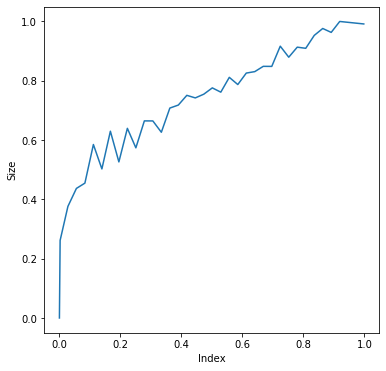

In [39]:
plt.rc('figure', figsize=(6, 6))
plt.plot(index_lst, s_lst)
plt.xlabel('Index')
plt.ylabel('Size')
plt.savefig('../images/iam_pb448-smoothness.png')
